In [2]:
%matplotlib inline

In [3]:
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
import numpy as np
import matplotlib.pyplot as pl
import qnm_filter
from scipy.special import logsumexp
import random
import qnm
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8)
}
matplotlib.rcParams.update(mplparams)

3.8708053835741385
5.070102805040862


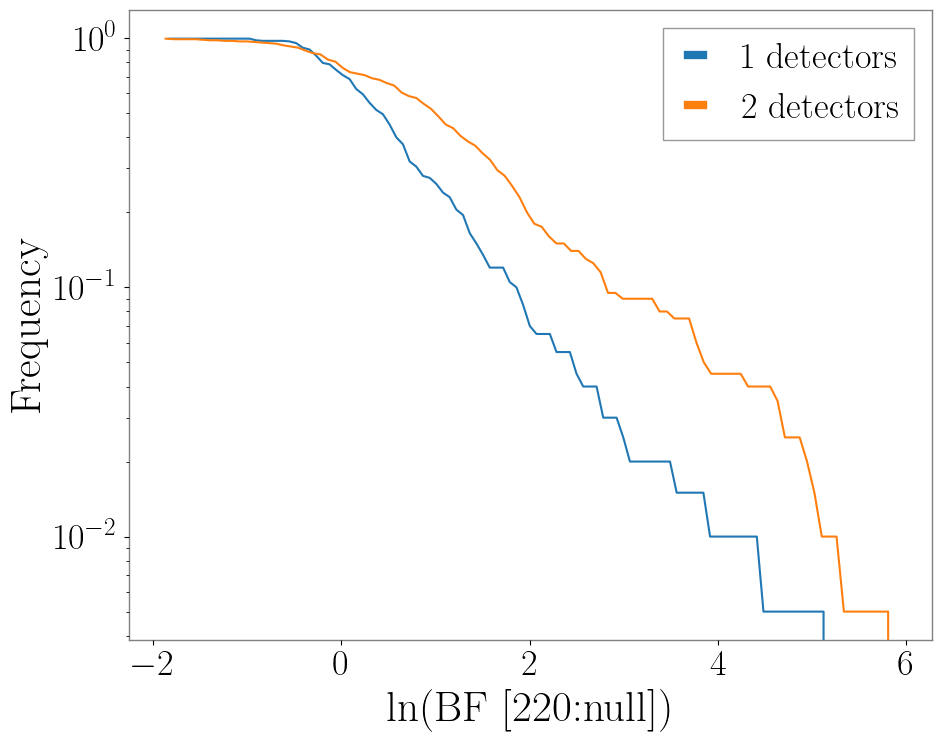

In [5]:
data = np.loadtxt("results/O4_design_overfiltered_220:None_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='1 detectors')
print(np.quantile(log_BF, 0.99))
# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
# pl.legend()

data = np.loadtxt("results/2detector_O4_design_overfiltered_220:None_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='2 detectors')

pl.xlabel("ln(BF [220:null])")
pl.ylabel("Frequency")
pl.legend()
# pl.title("0 mode injection case")
pl.tight_layout()
pl.savefig("plots/O4_design_0mode_injection_1+2_detectors.pdf")

3.8708053835741385
5.070102805040862
4.998211975512661
6.418879542616294


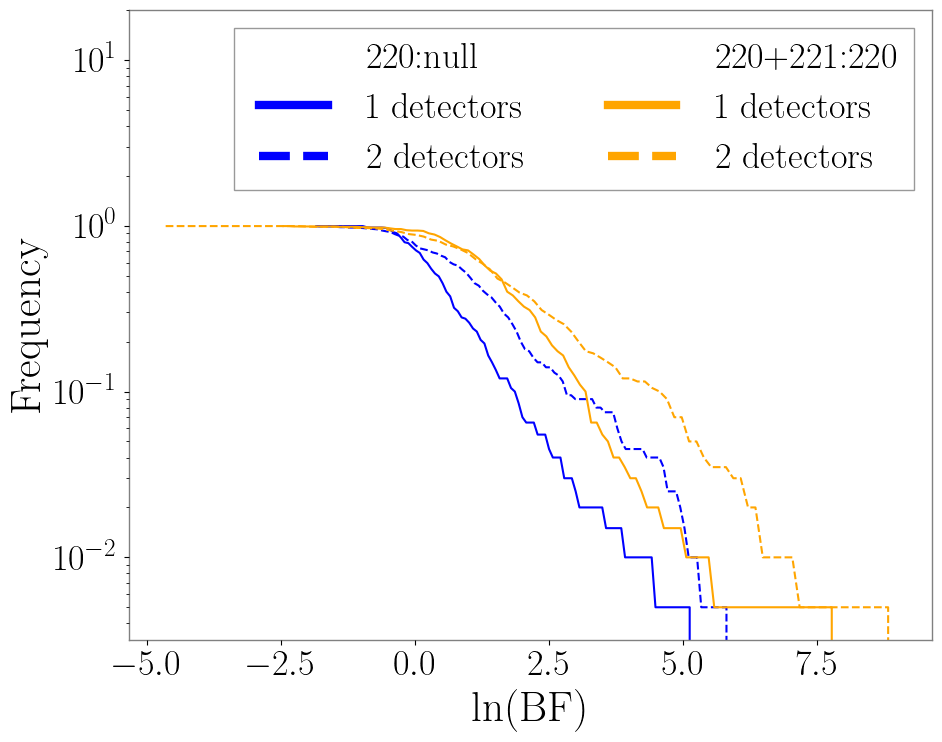

In [22]:
pl.plot(np.nan, np.nan, alpha=0, label='220:null')
data = np.loadtxt("results/O4_design_overfiltered_220:None_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='1 detectors', c='blue')
print(np.quantile(log_BF, 0.99))
# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
# pl.legend()

data = np.loadtxt("results/2detector_O4_design_overfiltered_220:None_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='2 detectors', c='blue', ls='--')

pl.plot(np.nan, np.nan, alpha=0, label='220+221:220')
data = np.loadtxt("results/O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='1 detectors', c='orange')
print(np.quantile(log_BF, 0.99))
# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
# pl.legend()

data = np.loadtxt("results/2detector_O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='2 detectors', c='orange', ls='--')

pl.xlabel("ln(BF)")
pl.ylabel("Frequency")
pl.legend(ncol=2, loc='upper right', handlelength=2.5)
pl.ylim(10**(-2.5), 2e1)
# pl.title("0 mode injection case")
pl.tight_layout()
pl.savefig("plots/O4_design_0mode_injection_1+2_detectors.pdf")

BF threshold = 4.998
BF threshold = 6.419


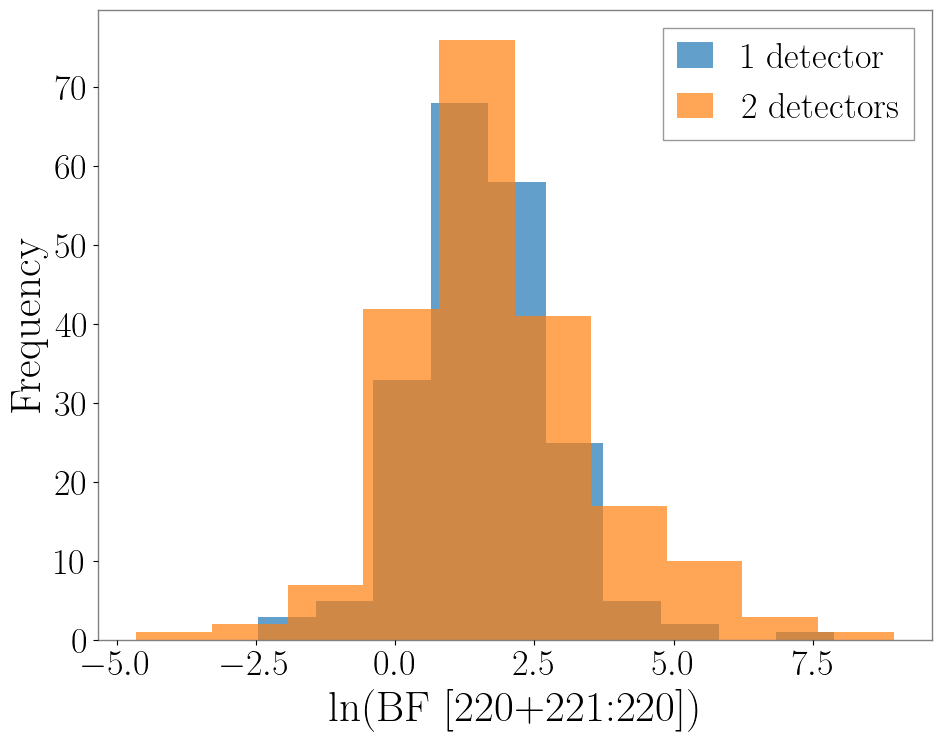

In [4]:
data = np.loadtxt("results/O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
print("BF threshold = %.3f" % np.quantile(log_BF, 0.99))
pl.hist(log_BF, bins=10, alpha=0.7, label='1 detector');

data = np.loadtxt("results/2detector_O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
print("BF threshold = %.3f" % np.quantile(log_BF, 0.99))
pl.hist(log_BF, bins=10, alpha=0.7, label='2 detectors');

# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
pl.legend()
pl.xlabel("ln(BF [220+221:220])")
pl.ylabel("Frequency")
# pl.title("1 mode injection case")
pl.tight_layout()
pl.savefig("plots/O4_design_1mode_injection_1+2_detectors.pdf")

BF threshold = 6.419
BF threshold = 4.852


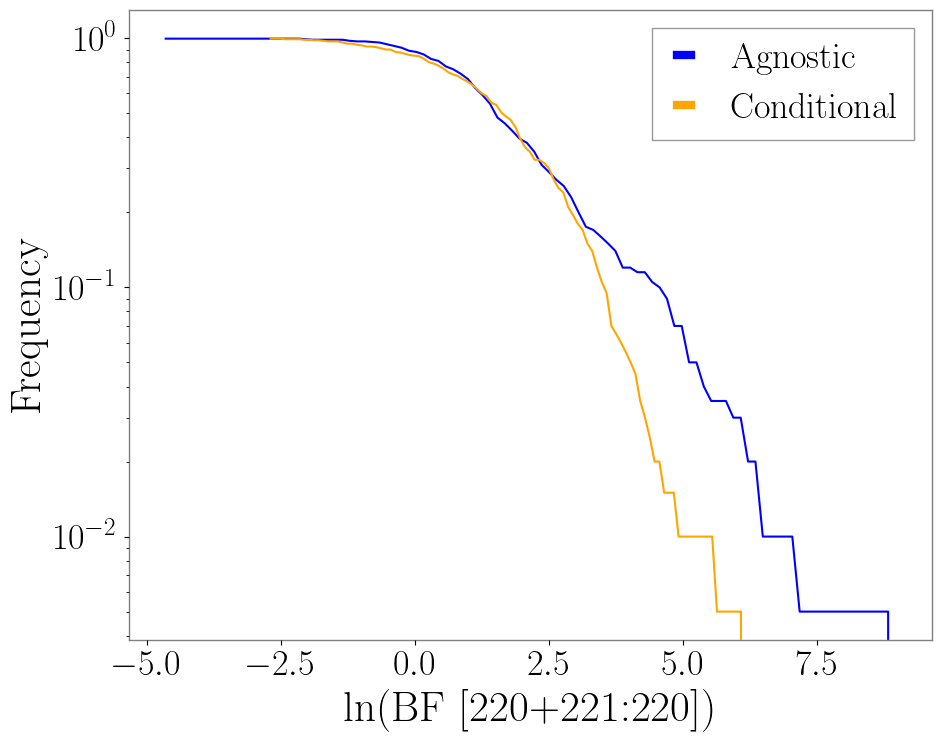

In [15]:
data = np.loadtxt("results/2detector_O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
print("BF threshold = %.3f" % np.quantile(log_BF, 0.99))
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='Agnostic', c='blue')

data = np.loadtxt("results/GW150914_posteriors_O4_design_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = evidence_filt - evidence_inj
print("BF threshold = %.3f" % np.quantile(log_BF, 0.99))
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='Conditional', c='orange')

# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
pl.legend()
pl.xlabel("ln(BF [220+221:220])")
pl.ylabel("Frequency")
# pl.title("1 mode injection case")
pl.tight_layout()
pl.savefig("plots/O4_design_1mode_injection_agnostic_conditional.pdf")